<a href="https://colab.research.google.com/github/shruti02002/test_demo/blob/master/BoardGamePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [2]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
1.3.5
3.2.2
0.11.2
1.0.2


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# Read in the data.
games = pandas.read_csv("games.csv", encoding= 'unicode_escape')

In [6]:
#Print the names of the columns in games
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


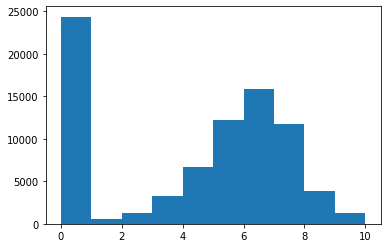

In [7]:
#Make a histogram of all the ratngs in the average_rating column
plt.hist(games["average_rating"])
plt.show()

In [8]:
#Print the first row of all the games with zero scores
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])

#print the forst row of all the games with scores greater than 0
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

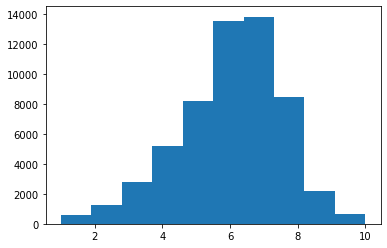

In [9]:
#Remove any rows without user reviews
games = games[games["users_rated"]>0]
#Remove any rows with missing values
games = games.dropna(axis=0)

#make a histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])
#Show the plot
plt.show()


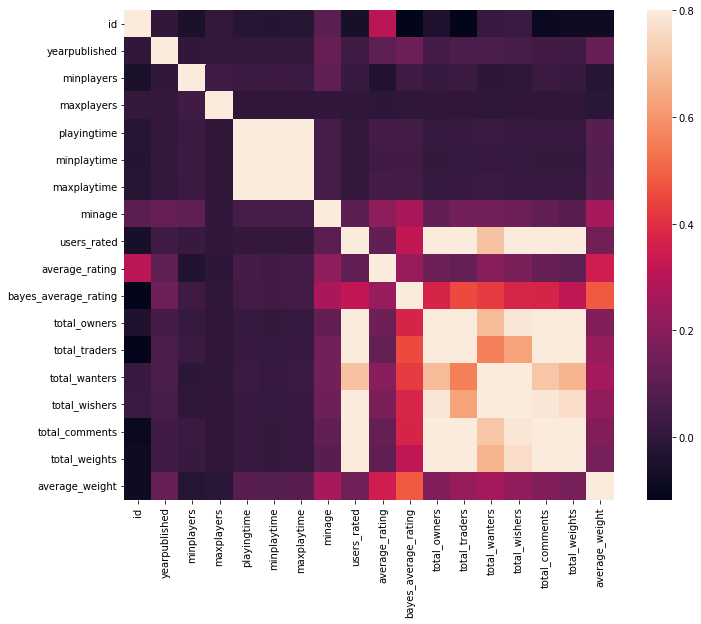

In [11]:
# correlation matrix- is a table showing the correaltion coefficients between diff set of variables
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [12]:
#Get all the columns from the dataframe
columns = games.columns.tolist()
#Filter the columns to remove ones we don't want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

#store the variable we'll be predicitng on
target = "average_rating"

In [14]:
#Generate training and test datasets
from sklearn.model_selection import train_test_split

#generate the trainingset. Set random_state to b able to replicate results
train =games.sample(frac=0.8, random_state=1)
#Select anything not in the training set and put it in the trainig set
test = games.loc[~games.index.isin(train.index)]
#Print the sahpes of both sets
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [18]:
#Import the linear regression model
from sklearn.linear_model import LinearRegression
#Import the sckit-learn function to compute error
from sklearn.metrics import mean_squared_error

#Initialize the model class.
LR = LinearRegression()

#Fit the model to the training data
LR.fit(train[columns], train[target])

#Generate our predctions for the test set.
predictions = LR.predict(test[columns])

#Compute error between our test predictions and the actual values
mean_squared_error(predictions, test[target])

2.0788190326293234

In [21]:
#Import the random forest model
from sklearn.ensemble import RandomForestRegressor

#Initialize the model class
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

#Fit the model to the data
RFR.fit(train[columns], train[target])

#generate our predictions for the test set
predictions =RFR.predict(test[columns])

#Compute error between our test predictions and the actual values
mean_squared_error(predictions, test[target])

1.4458625791207198

In [22]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [26]:
test[target].iloc[0]

8.07933